<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg" />
</center> 
     
## <center>  [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

#### <center> Author: [Yury Kashnitsky](https://yorko.github.io) (@yorko) 

# <center>Assignment #2. Fall 2019
## <center> Part 2. Gradient boosting

**In this assignment, you're asked to beat a baseline in the ["Flight delays" competition](https://www.kaggle.com/c/flight-delays-fall-2018).**

This time we decided to share a pretty decent CatBoost baseline, you'll have to improve the provided solution.

Prior to working on the assignment, you'd better check out the corresponding course material:
 1. [Classification, Decision Trees and k Nearest Neighbors](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic03_decision_trees_kNN/topic3_decision_trees_kNN.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-3-decision-trees-and-knn) 
 2. Ensembles:
  - [Bagging](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part1_bagging.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-1-bagging)
  - [Random Forest](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part2_random_forest.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-2-random-forest)
  - [Feature Importance](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part3_feature_importance.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-3-feature-importance)
 3. - [Gradient boosting](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic10_boosting/topic10_gradient_boosting.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-10-gradient-boosting) 
   - Logistic regression, Random Forest, and LightGBM in the "Kaggle Forest Cover Type Prediction" competition: [Kernel](https://www.kaggle.com/kashnitsky/topic-10-practice-with-logit-rf-and-lightgbm) 
 4. You can also practice with demo assignments, which are simpler and already shared with solutions:
  - "Decision trees with a toy task and the UCI Adult dataset": [assignment](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees) + [solution](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees-solution)
  - "Logistic Regression and Random Forest in the credit scoring problem": [assignment](https://www.kaggle.com/kashnitsky/assignment-5-logit-and-rf-for-credit-scoring) + [solution](https://www.kaggle.com/kashnitsky/a5-demo-logit-and-rf-for-credit-scoring-sol)
 5. There are also 7 video lectures on trees, forests, boosting and their applications: [mlcourse.ai/video](https://mlcourse.ai/video) 
 6. mlcourse.ai tutorials on [categorical feature encoding](https://www.kaggle.com/waydeherman/tutorial-categorical-encoding) (by Wayde Herman) and [CatBoost](https://www.kaggle.com/mitribunskiy/tutorial-catboost-overview) (by Mikhail Tribunskiy)
 7. Last but not the least: [Public Kernels](https://www.kaggle.com/c/flight-delays-fall-2018/notebooks) in this competition

### Your task is to:
 1. beat **"A2 baseline (10 credits)"** on Public LB (**0.75914** LB score)
 2. rename your [team](https://www.kaggle.com/c/flight-delays-fall-2018/team) in full accordance with A1 and the [course rating](https://docs.google.com/spreadsheets/d/15e1K0tg5ponA5R6YQkZfihrShTDLAKf5qeKaoVCiuhQ/) (to appear on 16.09.2019)
 
This task is intended to be relatively easy. Here you are not required to upload your reproducible solution.
 
### <center> Deadline for A2: 2019 October 6, 20:59 CET (London time)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, learning_curve
from xgboost import XGBClassifier

In [2]:
import matplotlib.pyplot as plt
from IPython.display import FileLink
import seaborn as sns
import pickle

In [3]:
!pwd
!ls -l
!ls -lR ../input/

/kaggle/working
total 16
-rw-r--r-- 1 root root 10206 Oct  5 23:36 __notebook__.ipynb
-rw-r--r-- 1 root root   270 Oct  5 23:36 __output__.json
../input/:
total 4
drwxr-xr-x 2 root root 4096 Oct  5 16:49 mlcourse-ai-flight-delays-xgboost-data

../input/mlcourse-ai-flight-delays-xgboost-data:
total 1312416
-rw-r--r-- 1 root root    102501 Oct  5 16:49 __notebook__.ipynb
-rw-r--r-- 1 root root       659 Oct  5 16:49 __output__.json
-rw-r--r-- 1 root root    358957 Oct  5 16:49 __results__.html
-rw-r--r-- 1 root root         0 Oct  5 16:49 custom.css
-rw-r--r-- 1 root root 424926694 Oct  5 16:49 test.h5
-rw-r--r-- 1 root root 245630891 Oct  5 16:49 test_enc.h5
-rw-r--r-- 1 root root 425634293 Oct  5 16:49 train.h5
-rw-r--r-- 1 root root 245630891 Oct  5 16:49 train_enc.h5
-rw-r--r-- 1 root root   1605136 Oct  5 16:49 y.h5


**Read previously saved data**

In [4]:
#train_df = pd.read_hdf('../input/mlcourse-ai-flight-delays-xgboost-data/train.h5')
#test_df = pd.read_hdf('../input/mlcourse-ai-flight-delays-xgboost-data/test.h5')

In [5]:
train_df = pd.read_hdf('../input/mlcourse-ai-flight-delays-xgboost-data/train_enc.h5')
#test_df = pd.read_hdf('../input/mlcourse-ai-flight-delays-xgboost-data/test_enc.h5')
y = pd.read_hdf('../input/mlcourse-ai-flight-delays-xgboost-data/y.h5')

**Train XGBoost**

In [6]:
%%time
# measure performance (GPU)
XGBClassifier(tree_method='gpu_hist').fit(train_df[:10000], y[:10000])

CPU times: user 388 ms, sys: 504 ms, total: 892 ms
Wall time: 1.08 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [7]:
%%time
# measure performance (CPU)
XGBClassifier().fit(train_df[:10000], y[:10000])

CPU times: user 9.18 s, sys: 52 ms, total: 9.23 s
Wall time: 9.24 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Use different **random_state** here.

In [8]:
%%time
params = {'max_depth': range(1, 11), 'n_estimators': range(1, 102, 10)}
grid = GridSearchCV(XGBClassifier(random_state=17, tree_method='gpu_hist'), params, cv=3,
                    scoring='roc_auc', verbose=True, return_train_score=True)
grid.fit(train_df, y)

Fitting 3 folds for each of 110 candidates, totalling 330 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed: 13.8min finished


CPU times: user 9min 17s, sys: 4min 35s, total: 13min 52s
Wall time: 13min 52s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=17, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, tree_method='gpu_hist',
                                     verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 11),
                         'n_estimators': range(1, 102

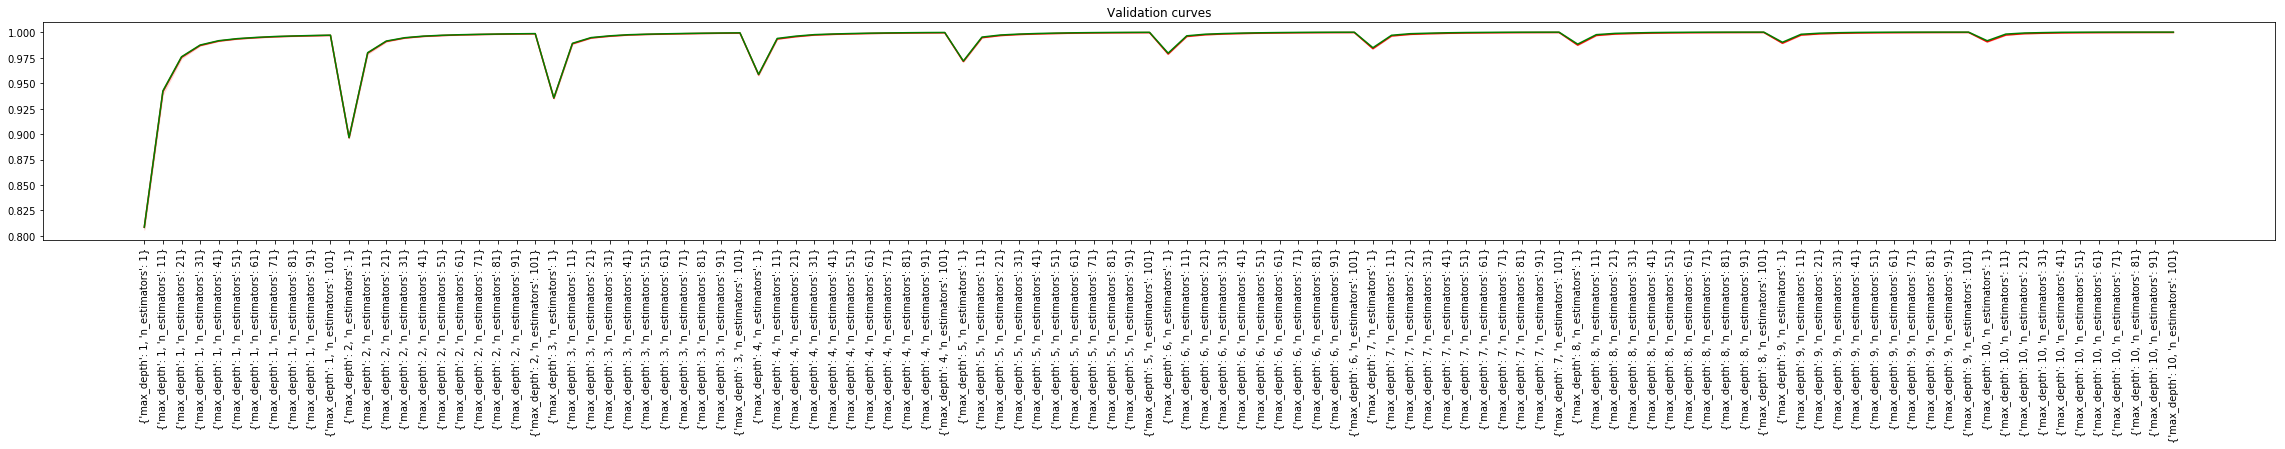

In [9]:
plt.figure(figsize=(40,4))
xx = [str(x) for x in grid.cv_results_['params']]
plt.plot(xx, grid.cv_results_['mean_test_score'], c='r')
plt.fill_between(xx, grid.cv_results_['mean_test_score'] - grid.cv_results_['std_test_score'],
                 grid.cv_results_['mean_test_score'] + grid.cv_results_['std_test_score'],
                 alpha=0.1, color="r")
plt.plot(xx, grid.cv_results_['mean_train_score'], c='g')
plt.fill_between(xx, grid.cv_results_['mean_train_score'] - grid.cv_results_['std_train_score'],
                 grid.cv_results_['mean_train_score'] + grid.cv_results_['std_train_score'],
                 alpha=0.1, color="g")
plt.xticks(rotation=90)
plt.title('Validation curves')
plt.show()

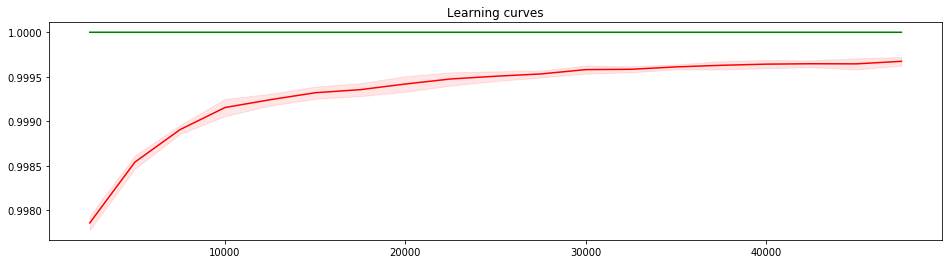

In [10]:
plt.figure(figsize=(16,4))
xx, train_scores, test_scores = learning_curve(grid.best_estimator_, train_df, y,
                                               train_sizes=range(len(train_df)//2//20, len(train_df)//2, len(train_df)//2//20),
                                               cv=3, scoring='roc_auc')
plt.plot(xx, np.mean(train_scores, axis=1), c='g')
plt.fill_between(xx, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                 np.mean(train_scores, axis=1) + np.std(train_scores, axis=1),
                 alpha=0.1, color="g")
plt.plot(xx, np.mean(test_scores, axis=1), c='r')
plt.fill_between(xx, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                 np.mean(test_scores, axis=1) + np.std(test_scores, axis=1),
                 alpha=0.1, color="r")
plt.title('Learning curves')
plt.show()

In [11]:
grid.best_params_

{'max_depth': 10, 'n_estimators': 101}

In [12]:
grid.best_score_

0.9997146809203241

Now's your turn! Go and improve the model to beat **"A2 baseline (10 credits)"** - **0.75914** LB score. It's crucial to come up with some good features. 

For discussions, stick to the **#a2_kaggle_fall2019** thread in the **mlcourse_ai_news** [ODS Slack](http://opendatascience.slack.com) channel. Serhii Romanenko (@serhii_romanenko) will be there to help. 

Welcome to Kaggle!

![img](https://habrastorage.org/webt/fs/42/ms/fs42ms0r7qsoj-da4x7yfntwrbq.jpeg)
*from the ["Nerd Laughing Loud"](https://www.kaggle.com/general/76963) thread.*